In [175]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [192]:
data = pd.read_csv('./data/Warehouse_and_Retail_Sales.csv')
data

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.00
...,...,...,...,...,...,...,...,...,...
307640,2020,9,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,5.00
307641,2020,9,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.12,37.0,240.75
307642,2020,9,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,2.25,0.0,0.00
307643,2020,9,BOSTON BEER CORPORATION,99990,SAM ADAMS SUMMER VARIETY 12PK NR,BEER,20.50,0.0,0.00


In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [179]:
columns = ['SUPPLIER', 'ITEM DESCRIPTION', 'ITEM CODE']
data = data.drop(columns=columns)
data.head()

,YEAR,MONTH,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,WINE,0.00,0.0,2.0
1,2020,1,WINE,0.00,1.0,4.0
2,2020,1,BEER,0.00,0.0,1.0
3,2020,1,WINE,0.00,0.0,1.0
4,2020,1,WINE,0.82,0.0,0.0


In [180]:
#Retail sales vs Warehouse sales
retail = data['RETAIL SALES'].sum()
print(retail.round())
warehouse = data['WAREHOUSE SALES'].sum()
print(warehouse.round())

2160899.0
7781756.0


In [181]:
#Analysis per item
item_type = data.groupby(['ITEM TYPE']).sum()
item_type.head(10)

,YEAR,MONTH,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
ITEM TYPE,,,,,
BEER,85610635,270898,574220.53,566714.00,6527236.51
DUNNAGE,191756,599,0.00,0.00,-121454.00
KEGS,20478724,64836,0.00,-1.00,118431.00
LIQUOR,131015604,414463,802691.43,794735.71,94906.27
NON-ALCOHOL,3851465,12092,34084.31,26666.38,26149.59
REF,256327,808,663.63,388.92,-20499.00
STR_SUPPLIES,817585,2523,2740.88,10846.58,0.00
WINE,378738407,1210040,746498.59,734618.04,1156984.91


In [182]:
to_drop = ['YEAR', 'MONTH']
item_type = item_type.drop(columns=to_drop, axis=1)
item_type

,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
ITEM TYPE,,,
BEER,574220.53,566714.00,6527236.51
DUNNAGE,0.00,0.00,-121454.00
KEGS,0.00,-1.00,118431.00
LIQUOR,802691.43,794735.71,94906.27
NON-ALCOHOL,34084.31,26666.38,26149.59
REF,663.63,388.92,-20499.00
STR_SUPPLIES,2740.88,10846.58,0.00
WINE,746498.59,734618.04,1156984.91


In [183]:
item_type.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, BEER to WINE
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   RETAIL SALES      8 non-null      float64
 1   RETAIL TRANSFERS  8 non-null      float64
 2   WAREHOUSE SALES   8 non-null      float64
dtypes: float64(3)
memory usage: 256.0+ bytes


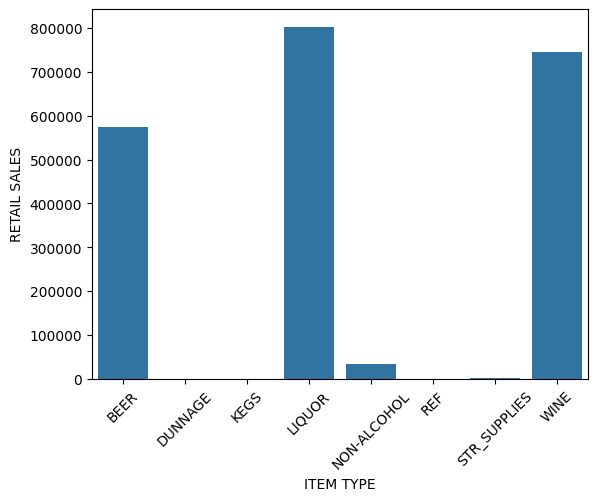

In [184]:
sns.barplot(item_type, x=item_type.index, y = item_type['RETAIL SALES'])
plt.xticks(rotation = 45)
plt.show()

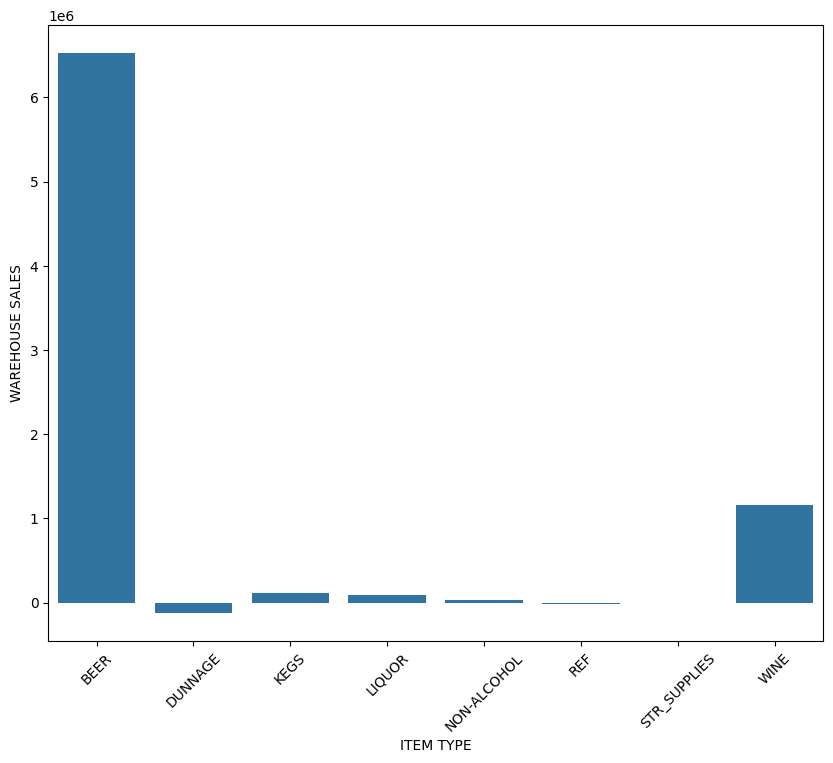

In [185]:
plt.figure(figsize=(10,8))
sns.barplot(item_type, x=item_type.index, y = item_type['WAREHOUSE SALES'])
plt.xticks(rotation = 45)
plt.show()

In [186]:
data.head()

,YEAR,MONTH,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,WINE,0.00,0.0,2.0
1,2020,1,WINE,0.00,1.0,4.0
2,2020,1,BEER,0.00,0.0,1.0
3,2020,1,WINE,0.00,0.0,1.0
4,2020,1,WINE,0.82,0.0,0.0


In [187]:
per_year_item = (
    data.groupby(['YEAR', 'ITEM TYPE'], as_index=False)['RETAIL SALES']
        .sum()
)

per_year_item.head(15)

,YEAR,ITEM TYPE,RETAIL SALES
0,2017,BEER,176650.34
1,2017,DUNNAGE,0.00
2,2017,KEGS,0.00
3,2017,LIQUOR,250652.84
4,2017,NON-ALCOHOL,7796.66
5,2017,REF,283.58
6,2017,STR_SUPPLIES,969.14
7,2017,WINE,250382.01
8,2018,BEER,35246.64
9,2018,DUNNAGE,0.00


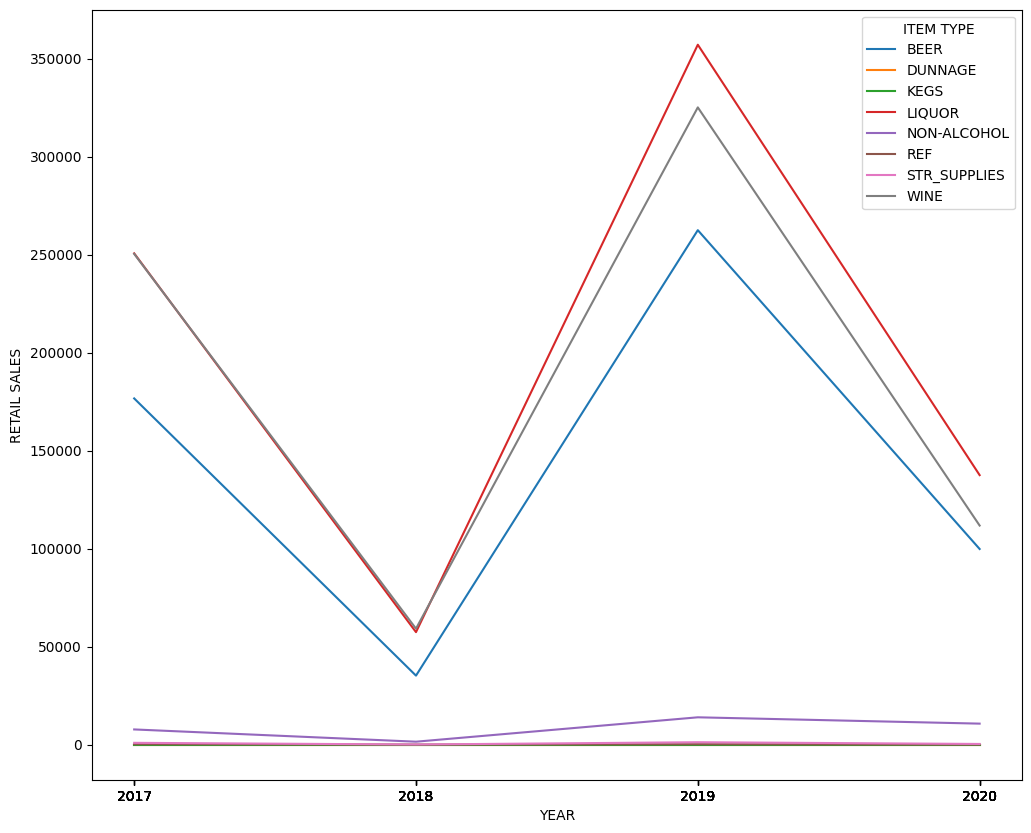

In [188]:
plt.figure(figsize=(12,10))
sns.lineplot(per_year_item, x=per_year_item.YEAR, y = per_year_item['RETAIL SALES'], hue=per_year_item['ITEM TYPE'])
plt.xticks(per_year_item['YEAR'])
plt.show()

In [189]:
per_year_warehouse = (
    data.groupby(['YEAR', 'ITEM TYPE'], as_index=False)['WAREHOUSE SALES']
        .sum()
)

per_year_warehouse.head(15)

,YEAR,ITEM TYPE,WAREHOUSE SALES
0,2017,BEER,1970278.96
1,2017,DUNNAGE,-40771.00
2,2017,KEGS,39001.00
3,2017,LIQUOR,25736.63
4,2017,NON-ALCOHOL,7739.84
5,2017,REF,-6604.00
6,2017,STR_SUPPLIES,0.00
7,2017,WINE,338466.70
8,2018,BEER,425699.57
9,2018,DUNNAGE,-10365.00


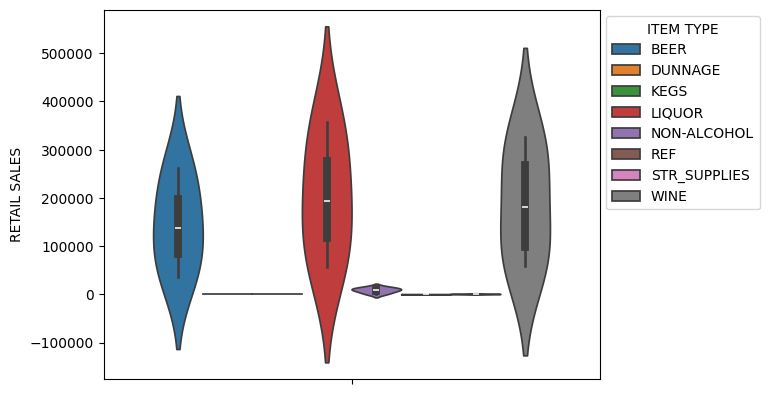

In [199]:
ax = sns.violinplot(per_year_item, y=per_year_item['RETAIL SALES'], hue=per_year_item['ITEM TYPE'])
sns.move_legend(ax, 'upper left', bbox_to_anchor = (1,1))

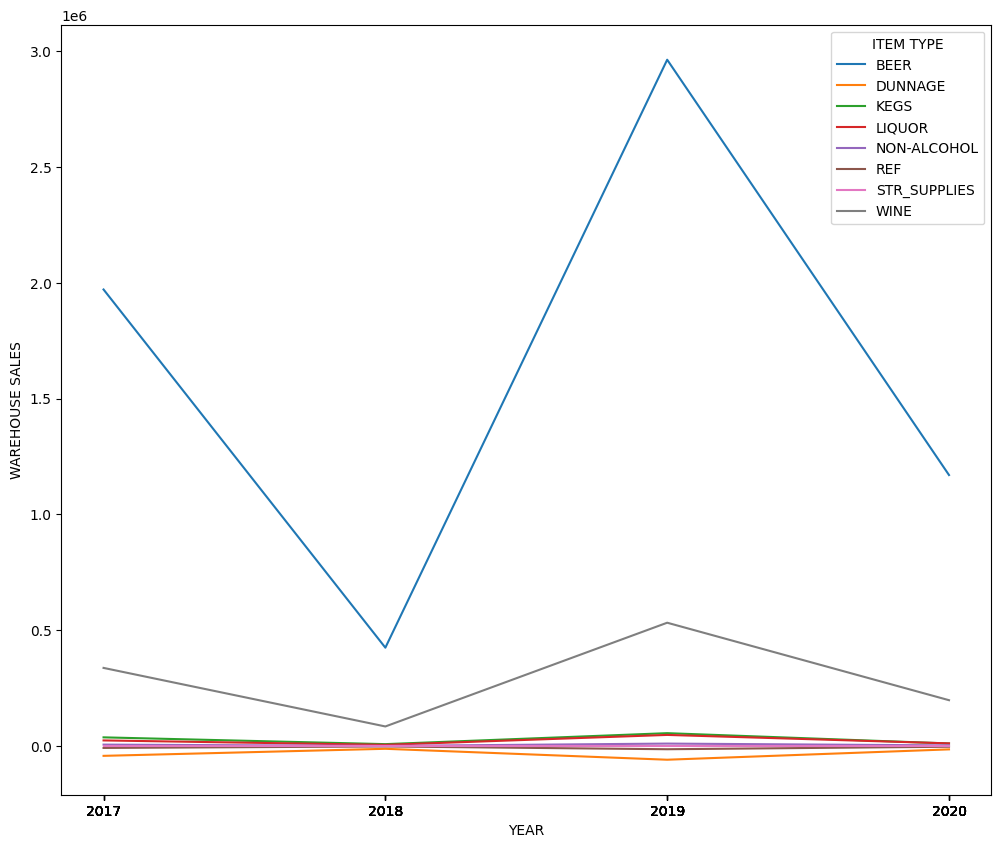

In [190]:
plt.figure(figsize=(12,10))
sns.lineplot(per_year_warehouse, x=per_year_warehouse.YEAR, y = per_year_warehouse['WAREHOUSE SALES'], hue=per_year_warehouse['ITEM TYPE'])
plt.xticks(per_year_warehouse['YEAR'])
plt.show()

<Axes: ylabel='WAREHOUSE SALES'>

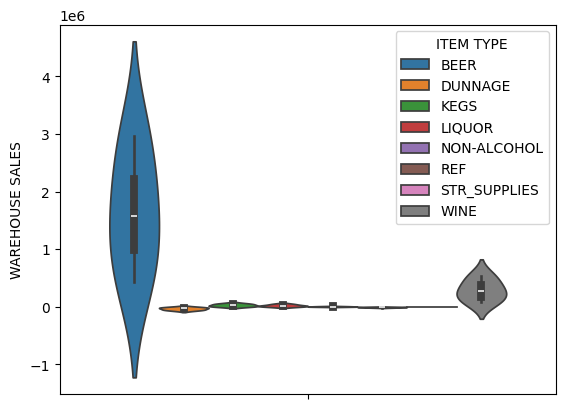

In [197]:
sns.violinplot(per_year_warehouse, y=per_year_warehouse['WAREHOUSE SALES'], hue=per_year_warehouse['ITEM TYPE'])

,YEAR,MONTH,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,WINE,0.00,0.0,2.00
1,2020,1,WINE,0.00,1.0,4.00
2,2020,1,BEER,0.00,0.0,1.00
3,2020,1,WINE,0.00,0.0,1.00
4,2020,1,WINE,0.82,0.0,0.00
...,...,...,...,...,...,...
307640,2020,9,BEER,0.00,0.0,5.00
307641,2020,9,BEER,66.12,37.0,240.75
307642,2020,9,BEER,2.25,0.0,0.00
307643,2020,9,BEER,20.50,0.0,0.00
